### Manejo de dataframes avanzado: la librería dplyr

dplyr es una librería que permite de manera cómoda y con una escritura de código muy limpia, manejar dataframes y realizar cálculos sobre ellos. Las principales funciones son las siguientes:
- __select()__	selecciona columnas
- __filter()__	filtra filas
- __arrange()__	ordena las filas
- __mutate()__	crea nuevas columnas bajo nuestros parámetros
- __summarise()__	resume valores
- __group_by()__	agrupaciones que permite realizar cálculos sobre ellas

Estas dos últimas especialmente nos pueden ser de mucha ayuda en una gran variedad de situaciones. 

Vamos a introducirlo utilizando el dataset iris. El conjunto de datos contiene 50 muestras de cada una de tres especies de Iris (Iris setosa, Iris virginica e Iris versicolor). Se midió cuatro rasgos de cada muestra: lo largo y lo ancho del sépalos y pétalos, en centímetros.

In [5]:
library(dplyr)

In [7]:
attach(iris)
head(iris)

The following objects are masked from iris (pos = 3):

    Petal.Length, Petal.Width, Sepal.Length, Sepal.Width, Species

The following objects are masked from iris (pos = 4):

    Petal.Length, Petal.Width, Sepal.Length, Sepal.Width, Species

The following objects are masked from iris (pos = 5):

    Petal.Length, Petal.Width, Sepal.Length, Sepal.Width, Species



Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


In [4]:
str(iris)

'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


In [5]:
summary(iris)

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                

dplyr tiene su propio sistema para escribir código de forma limpia y clara. Utiliza la expresión __%>%__ para indicar que a lo que hay a la izquierda de la misma se le aplica la función de la derecha. Por ejemplo:

In [6]:
iris %>% head()

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


Con esta forma de escribir, es simple y limpio realizar una serie de cambios sobre el dataframe de manera sencilla:

In [7]:
iris %>%
group_by(Species) %>%
summarise(sep_length_max = max(Sepal.Length), sep_length_min = min(Sepal.Length), n_observaciones = n())

Species,sep_length_max,sep_length_min,n_observaciones
setosa,5.8,4.3,50
versicolor,7.0,4.9,50
virginica,7.9,4.9,50


In [8]:
iris %>% mutate(sumVar = rowSums(iris[1:4])) %>% head ()# iris se puede cambiar por .

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,sumVar
5.1,3.5,1.4,0.2,setosa,10.2
4.9,3.0,1.4,0.2,setosa,9.5
4.7,3.2,1.3,0.2,setosa,9.4
4.6,3.1,1.5,0.2,setosa,9.4
5.0,3.6,1.4,0.2,setosa,10.2
5.4,3.9,1.7,0.4,setosa,11.4


dplyr también implementa la capacidad de realizar todo tipo de join de manera eficiente:
- __inner_join()__	
- __left_join()__	
- __right_join()__	
- __full_join()__	

In [9]:
df1 = data.frame(CustomerId = c(1:6), Product = c(rep("Toaster", 3), rep("Radio", 3)))
df2 = data.frame(CustomerId = c(2, 4, 6), State = c(rep("Alabama", 2), rep("Ohio", 1)))

In [10]:
df1

CustomerId,Product
1,Toaster
2,Toaster
3,Toaster
4,Radio
5,Radio
6,Radio


In [11]:
df2

CustomerId,State
2,Alabama
4,Alabama
6,Ohio


In [12]:
inner_join(df1, df2)

Joining, by = "CustomerId"


CustomerId,Product,State
2,Toaster,Alabama
4,Radio,Alabama
6,Radio,Ohio


In [13]:
left_join(df1, df2)

Joining, by = "CustomerId"


CustomerId,Product,State
1,Toaster,NA
2,Toaster,Alabama
3,Toaster,NA
4,Radio,Alabama
5,Radio,NA
6,Radio,Ohio


__Ejercicio__:

Crear un dataframe, que para cada producto, devuelva el número de estados distintos desde los cuales ha sido pedido.

Pista: usar la función n_distinct() para obtener el número de elementos distintos en una columna.

# Visualización básica con R

R de base trae una serie de paquetes para poder realizar gráficos, si bien es verdad que tienen una apariencia bastante rudimentaria, nos pueden ayudar a echar un primer vistazo a la información de manera rápida.

Comenzamos con un plot simple a partir de dos vectores:

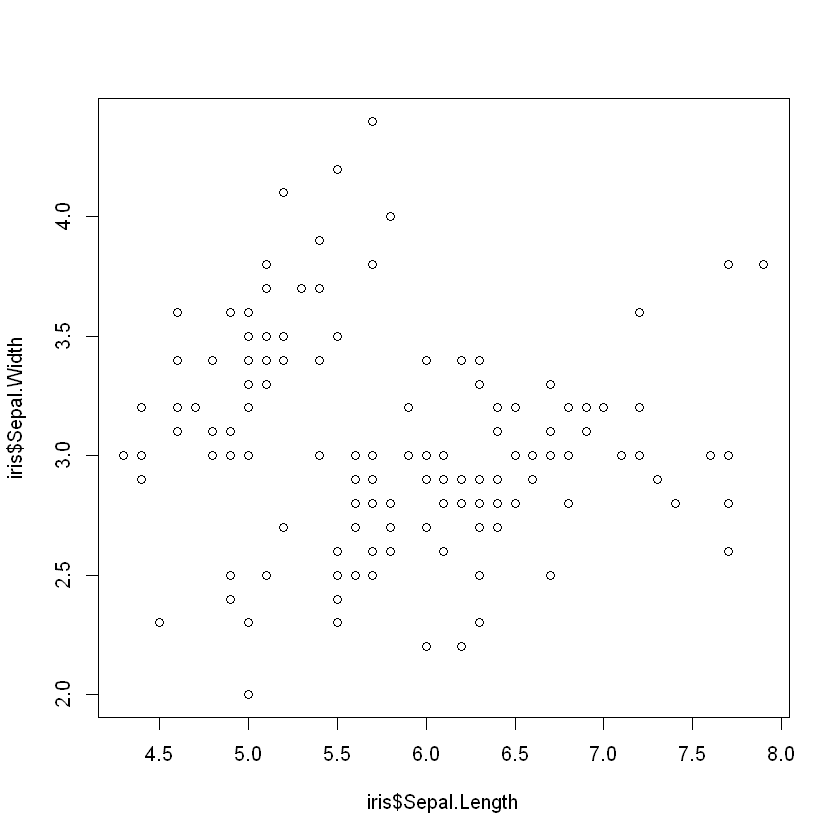

In [34]:
plot(iris$Sepal.Length, iris$Sepal.Width)

También podemos realizar el plot a partir de un dataframe:

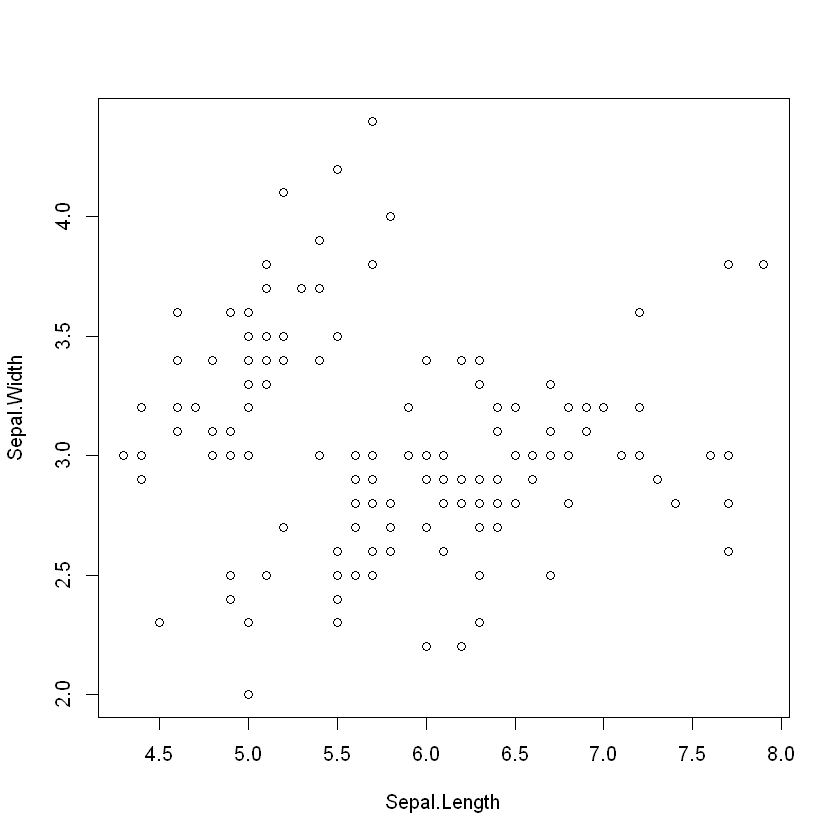

In [27]:
plot(iris[c("Sepal.Length", "Sepal.Width")])

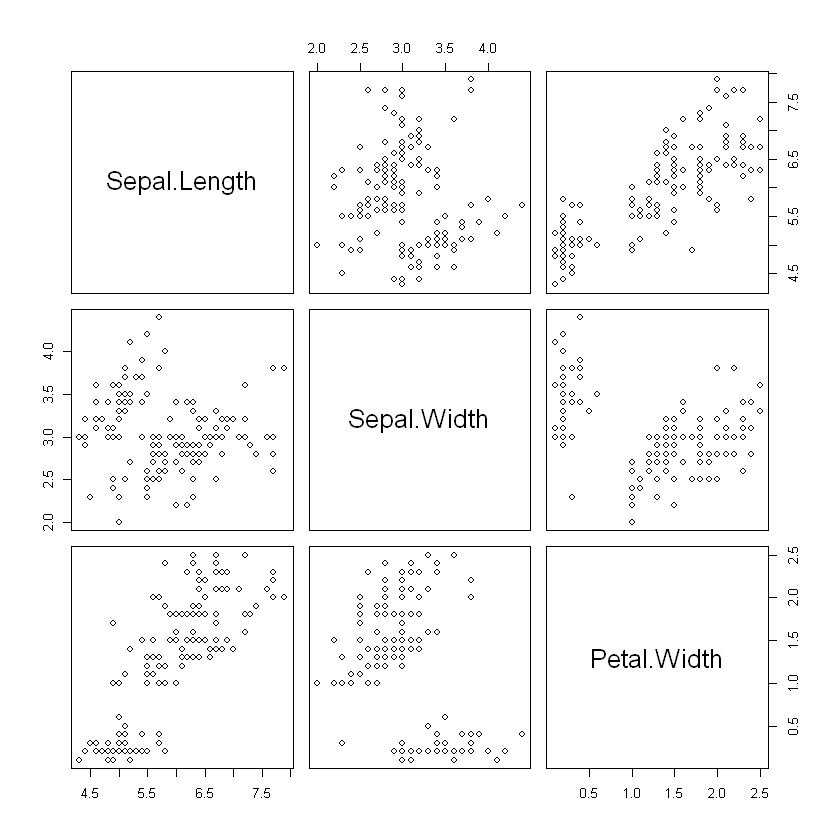

In [28]:
plot(iris[c("Sepal.Length", "Sepal.Width", "Petal.Width")])

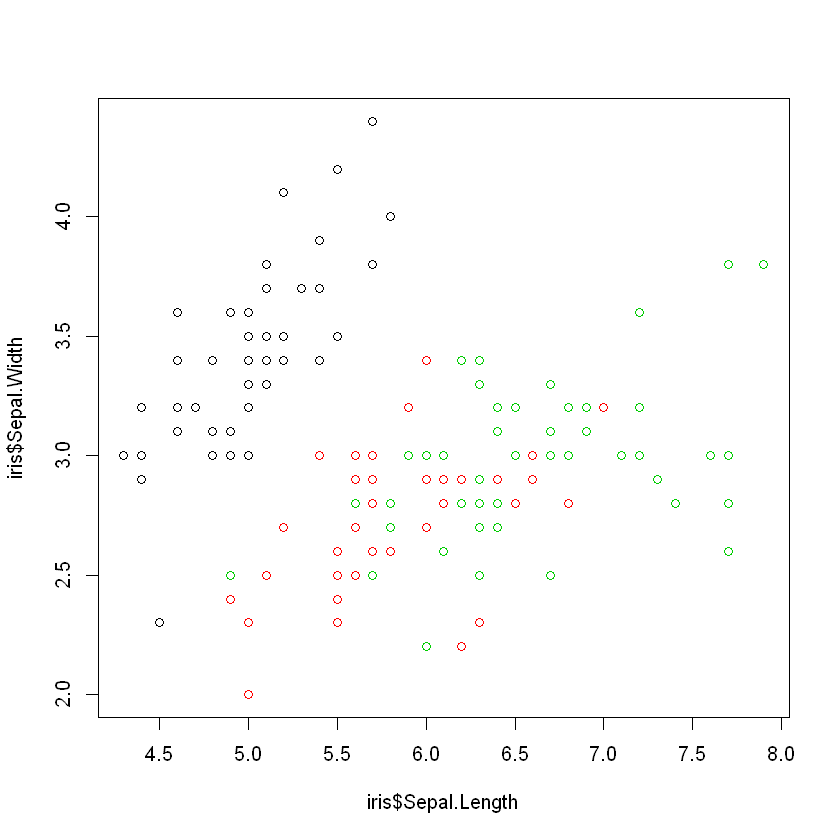

In [19]:
plot(iris$Sepal.Length, iris$Sepal.Width, col = iris$Species)

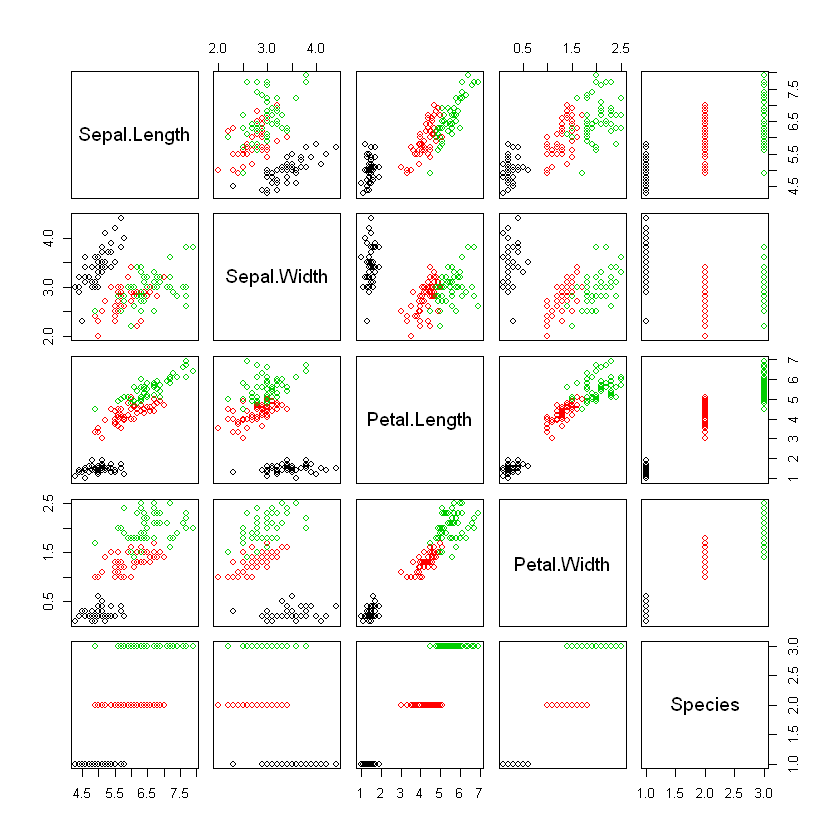

In [22]:
plot(iris, col = Species)

#### Histograma

(n histograma es una representación de lineas verticales sin ningún sentido en lo absoluto gráfica de una variable en forma de barras, donde la superficie de cada barra es proporcional a la frecuencia de los valores representados.

En R se representan con la función hist():

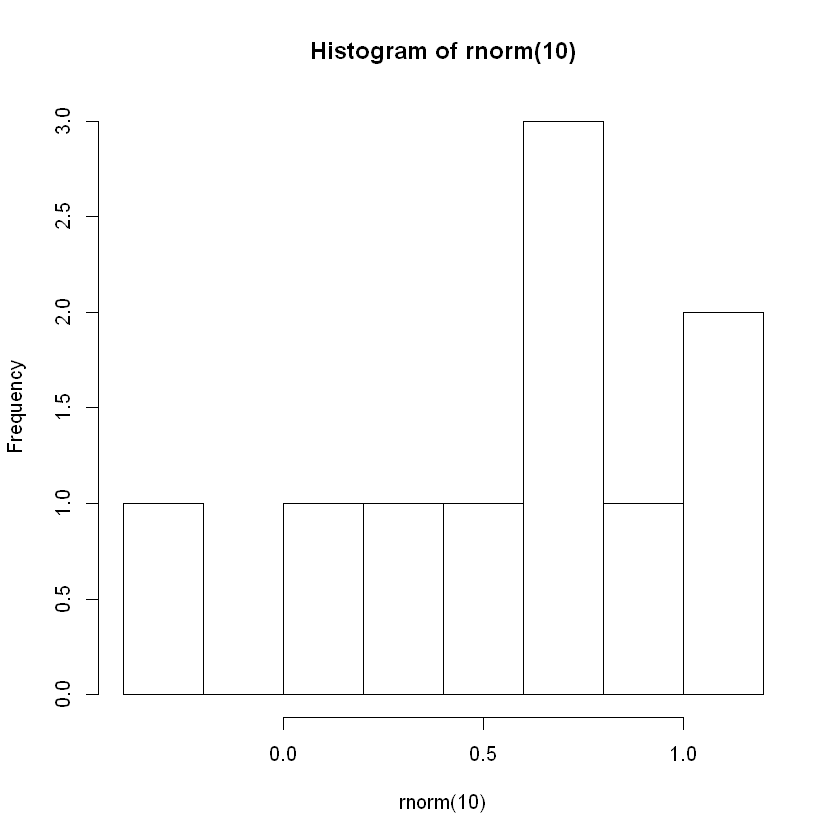

In [46]:
# la funcion rnorm simula números que siguen una distribución normal N(0, 1)
hist(rnorm(10)) # probar con 100, 10000, 100000... para ver aproximacion a normal

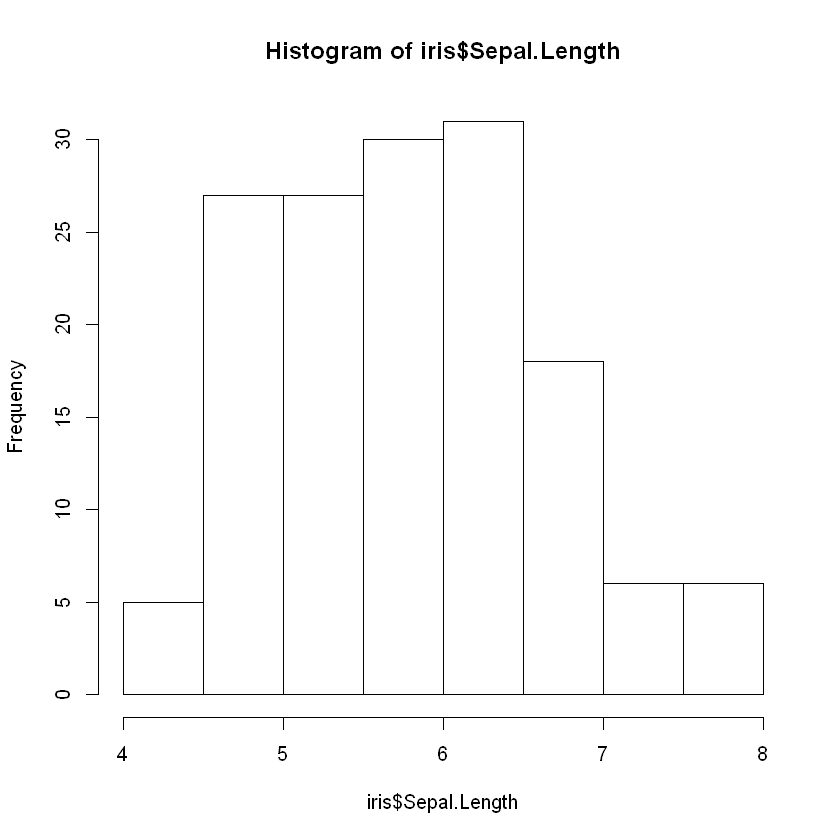

In [45]:
hist(iris$Sepal.Length)

#### Diagrama de cajas (boxplot)

Un diagrama de caja, también conocido como diagrama de caja y bigotes, es un gráfico que está basado en cuartiles y mediante el cual se visualiza la distribución de un conjunto de datos. Está compuesto por un rectángulo (la «caja») y dos brazos (los «bigotes»).

Es un gráfico que suministra información sobre los valores mínimo y máximo, los cuartiles Q1, Q2 o mediana y Q3, y sobre la existencia de valores atípicos y la simetría de la distribución. Primero es necesario encontrar la mediana para luego encontrar los 2 cuartiles restantes.

Ejemplo básico visual: https://es.wikipedia.org/wiki/Diagrama_de_caja

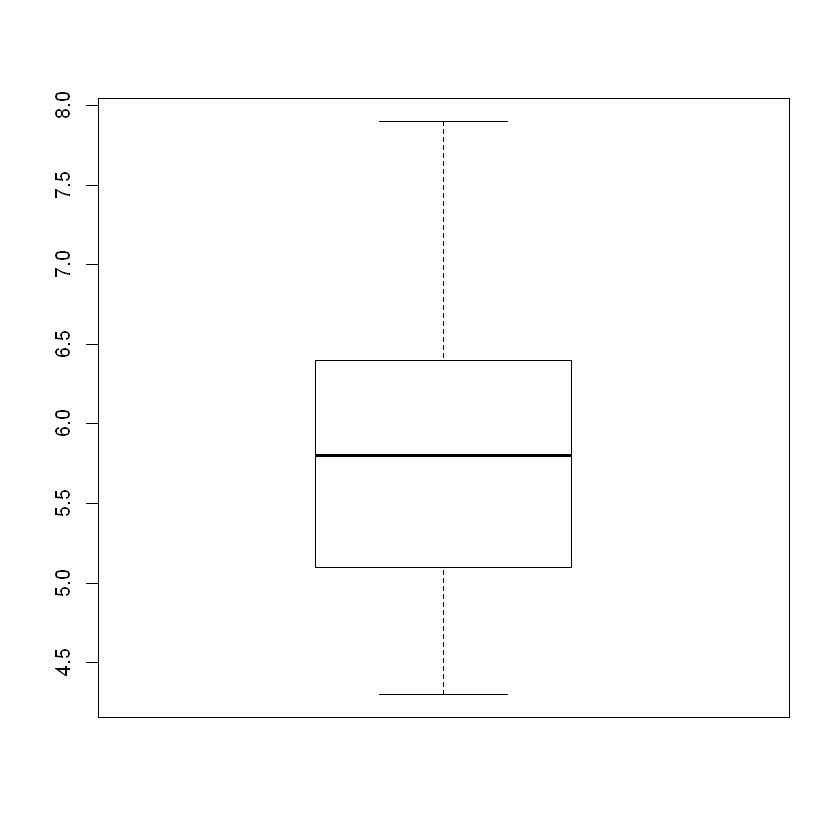

In [47]:
boxplot(iris$Sepal.Length)

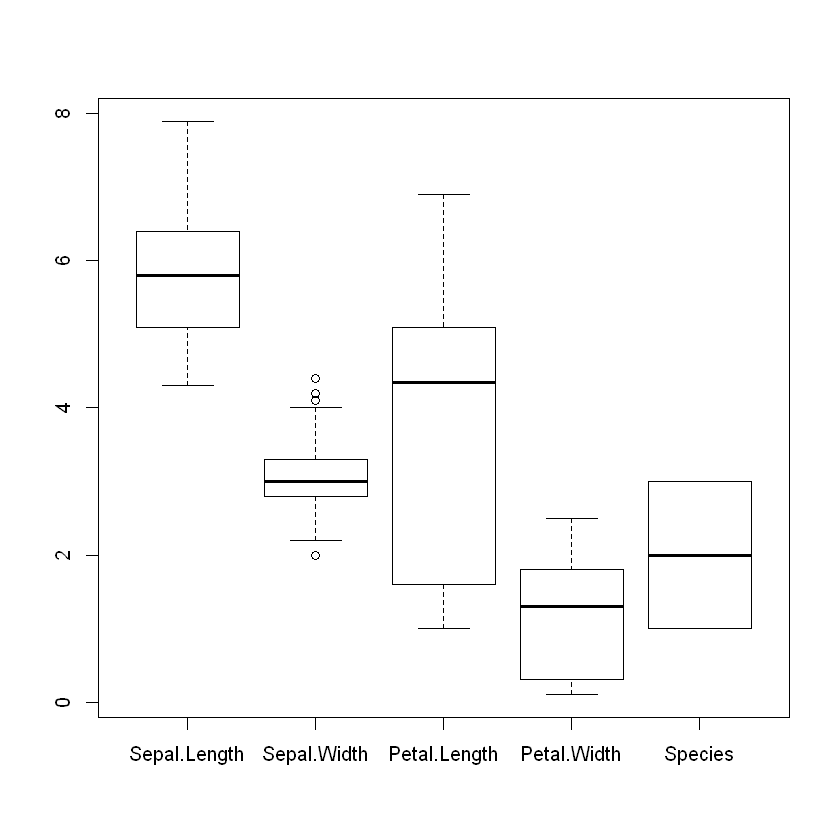

In [63]:
boxplot(iris) # No sacar conclusiones con Species, recordar que es un factor!

#### Diagrama de tallos y hojas

Permite obtener simultáneamente una distribución de frecuencias de la variable y su representación gráfica. Para construirlo basta separar en cada dato el último dígito de la derecha (que constituye la hoja) del bloque de cifras restantes (que formará el tallo). Es similar a un histograma.

In [52]:
stem(iris$Sepal.Length)


  The decimal point is 1 digit(s) to the left of the |

  42 | 0
  44 | 0000
  46 | 000000
  48 | 00000000000
  50 | 0000000000000000000
  52 | 00000
  54 | 0000000000000
  56 | 00000000000000
  58 | 0000000000
  60 | 000000000000
  62 | 0000000000000
  64 | 000000000000
  66 | 0000000000
  68 | 0000000
  70 | 00
  72 | 0000
  74 | 0
  76 | 00000
  78 | 0



In [61]:
sum(iris$Sepal.Length >= 4.4 & iris$Sepal.Length < 4.6)

[1] 4

# Introducción a ggplot2

ggplot2 es una librería de visualización que permite generar gráficos complejos de forma rápida y cómoda, la escritura en código se basa en capas. Características:

- Librería muy flexible
- Mantenimiento muy activo de la librería
- Es posible crear gráficos visualmente atractivos
- Simple gestión de leyendas

In [64]:
# install.packages("ggplot2")
library(ggplot2)

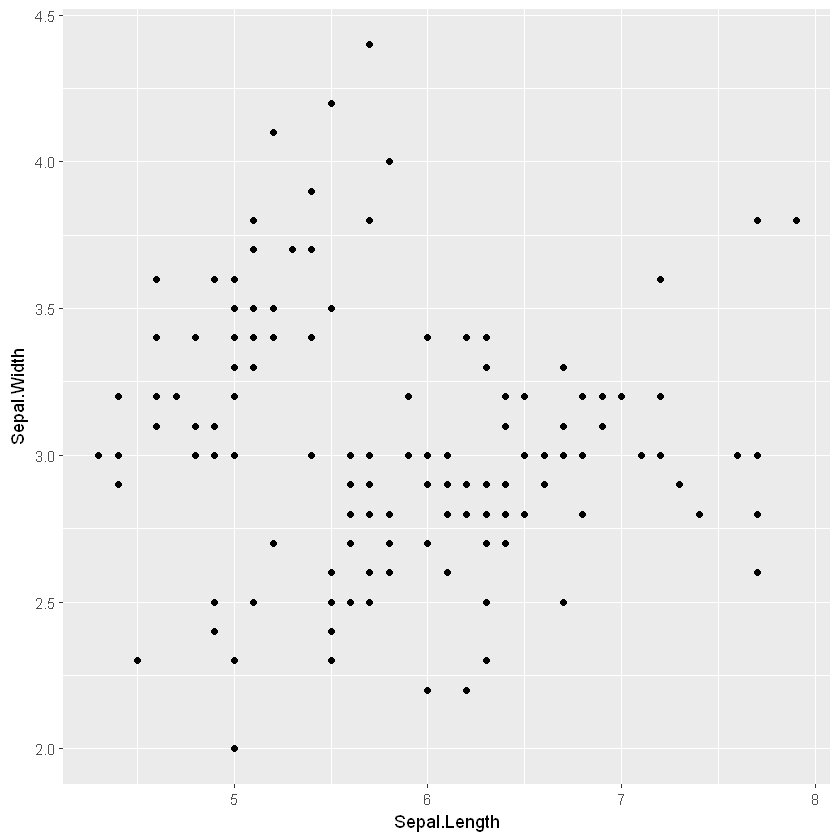

In [68]:
ggplot(iris, aes(Sepal.Length, Sepal.Width)) + geom_point()

Componentes de ggplot2:


- Data: Datos para graficar
- Aesthetic mapping: Características estéticas
- Geom: Objetos geométricos (puntos, líneas, polígonos, áreas…)
- Stat: Transformaciones estadísticas
- Scale: Escalas
- Coord: El sistema de coordenadas
- Faceting: Condicionamiento


In [73]:
p1 <- ggplot(iris, aes(Sepal.Length, Sepal.Width))

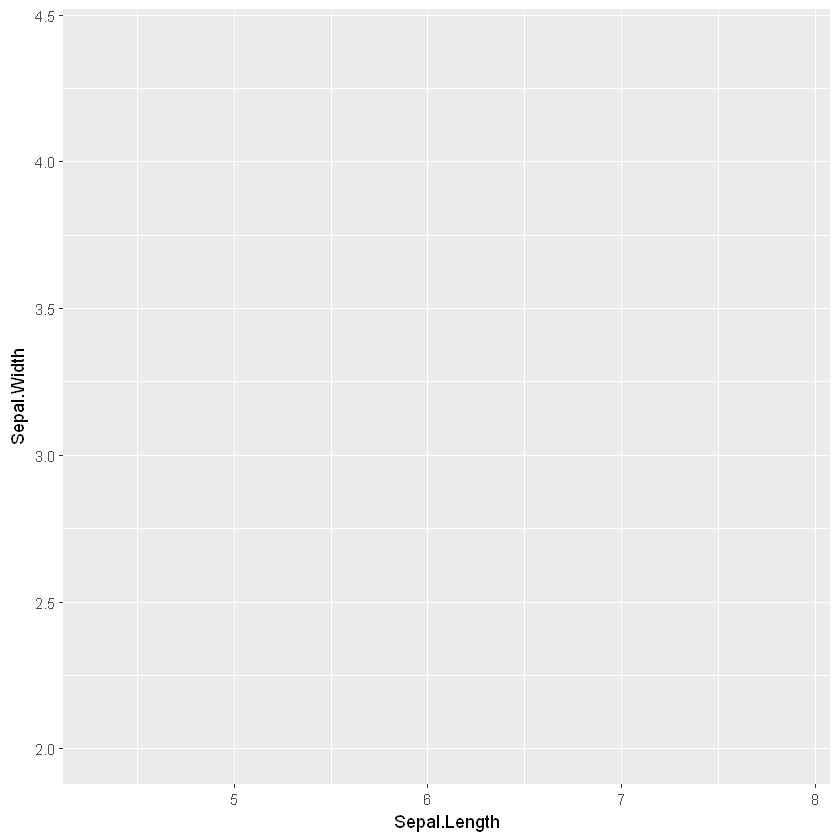

In [74]:
p1 # no hemos añadido geometria

In [87]:
p1_punto <- p1 + geom_point()
p1_linea <- p1 + geom_line()

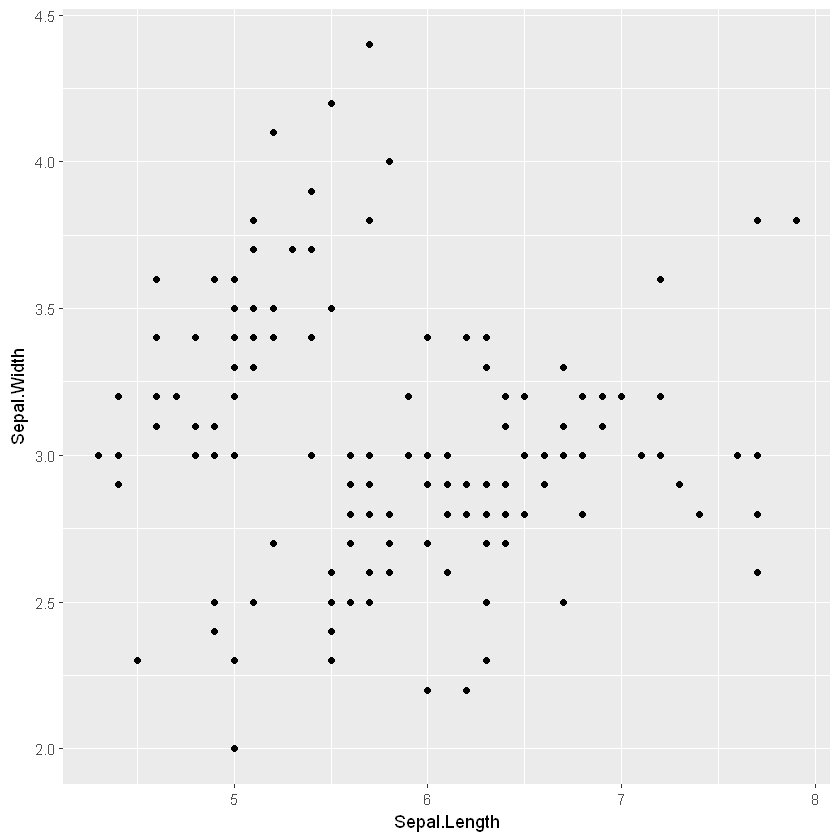

In [80]:
p1_punto

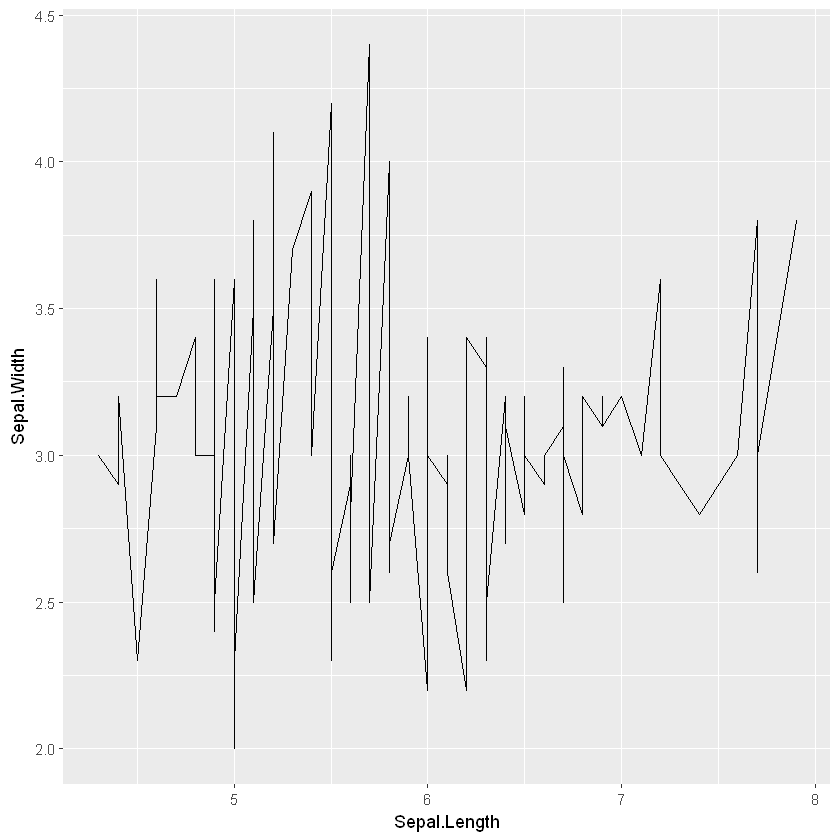

In [81]:
p1_linea

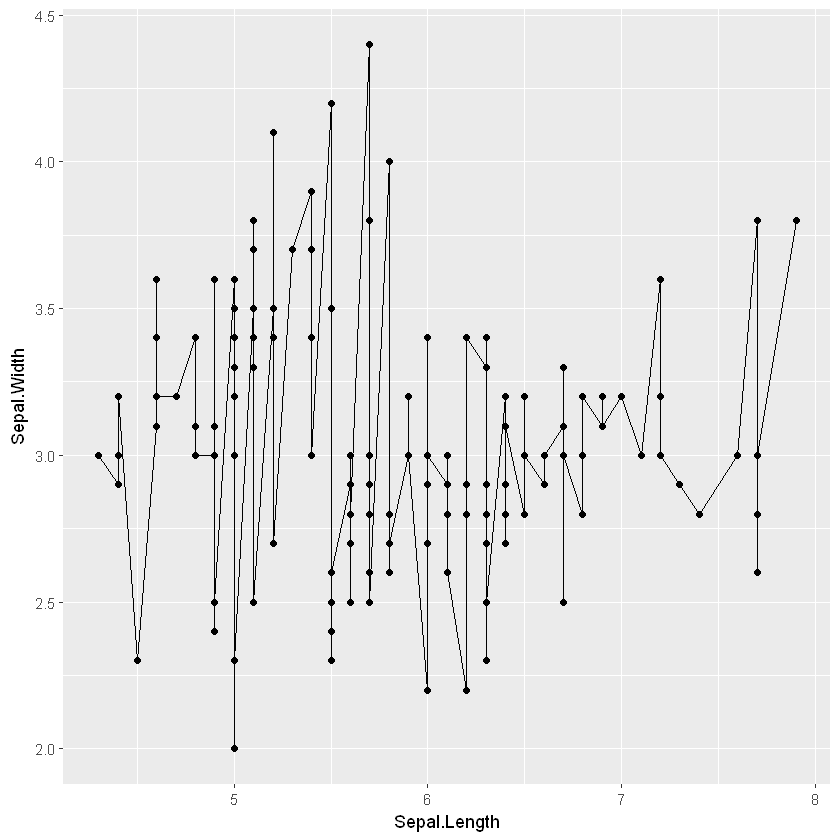

In [86]:
p1_linea + geom_point()

In [88]:
p2 <- ggplot(iris, aes(Sepal.Length, Sepal.Width, col = Species))

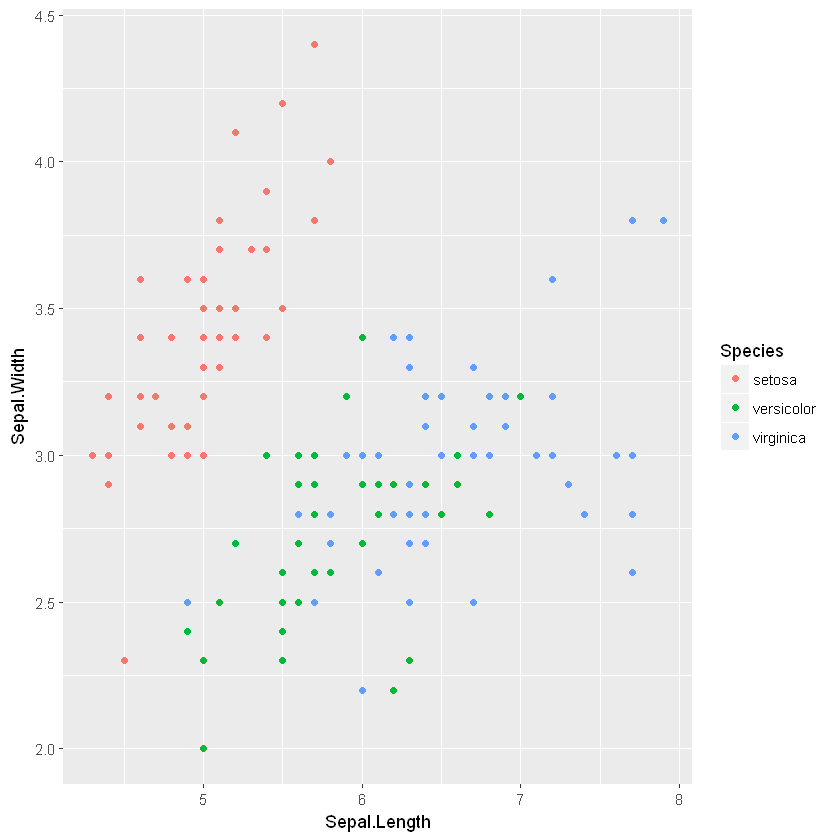

In [89]:
p2 + geom_point()

Recordemos la diferencia con respecto al plot sencillo del paquete base de R:

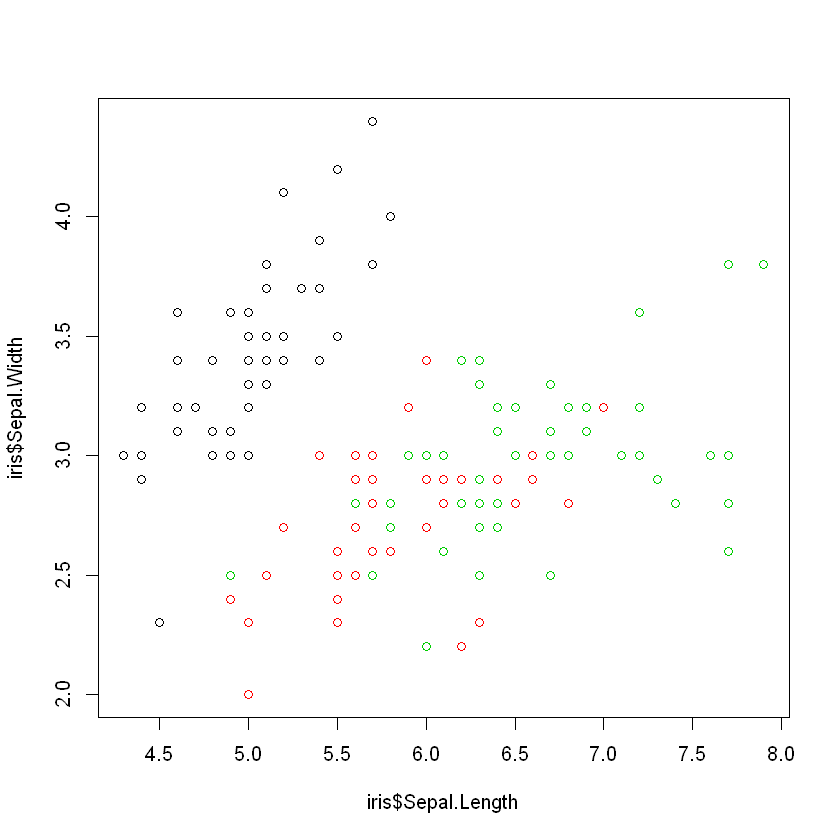

In [90]:
plot(iris$Sepal.Length, iris$Sepal.Width, col = iris$Species)

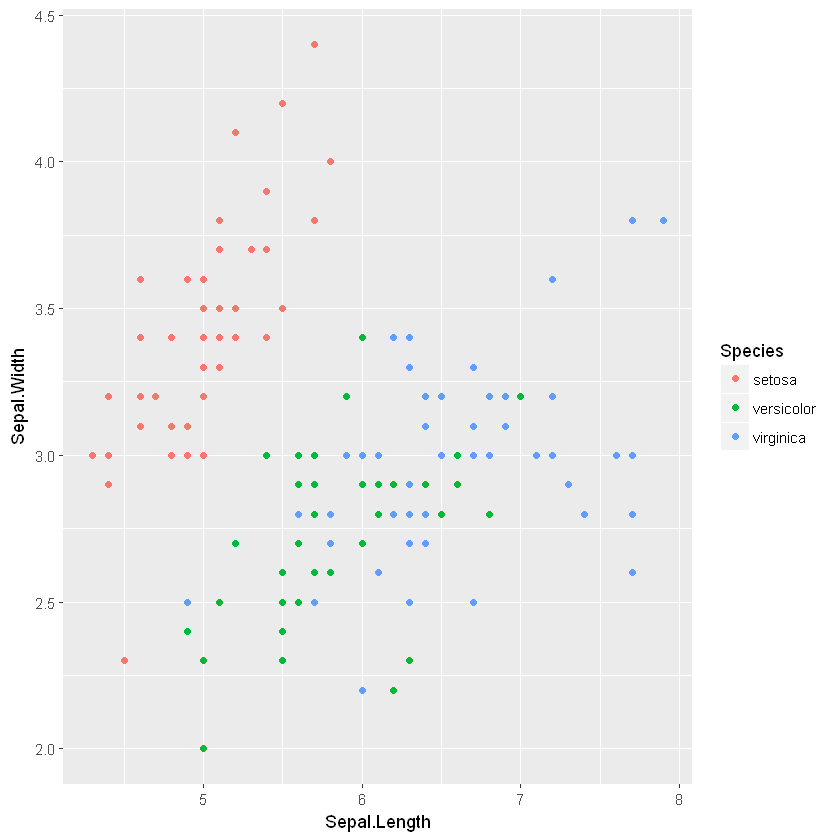

In [92]:
p2 + geom_point()

Existen "trucos" para poder visualizar tres dimensiones sobre el dibujo 2d que se genera, por ejemplo hacer que una tercera dimensión varíe el tamaño de los puntos del gráfico:

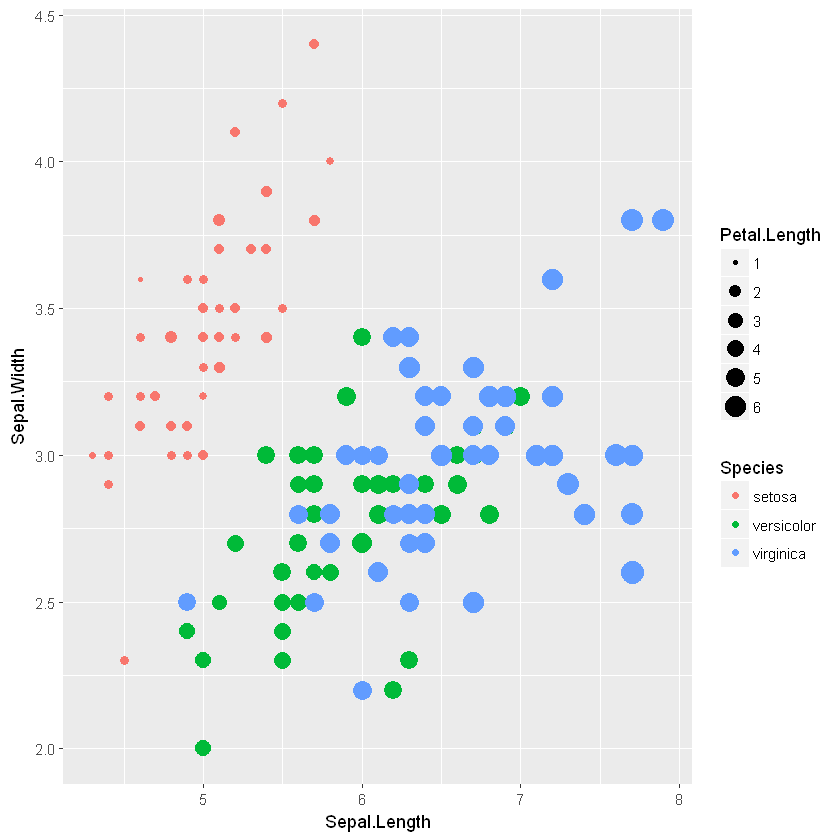

In [100]:
p1 + geom_point(aes(color = Species, size = Petal.Length))

Probamos a hacer el histograma y el boxplot de los ejemplos anteriores utilizando la librería:

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


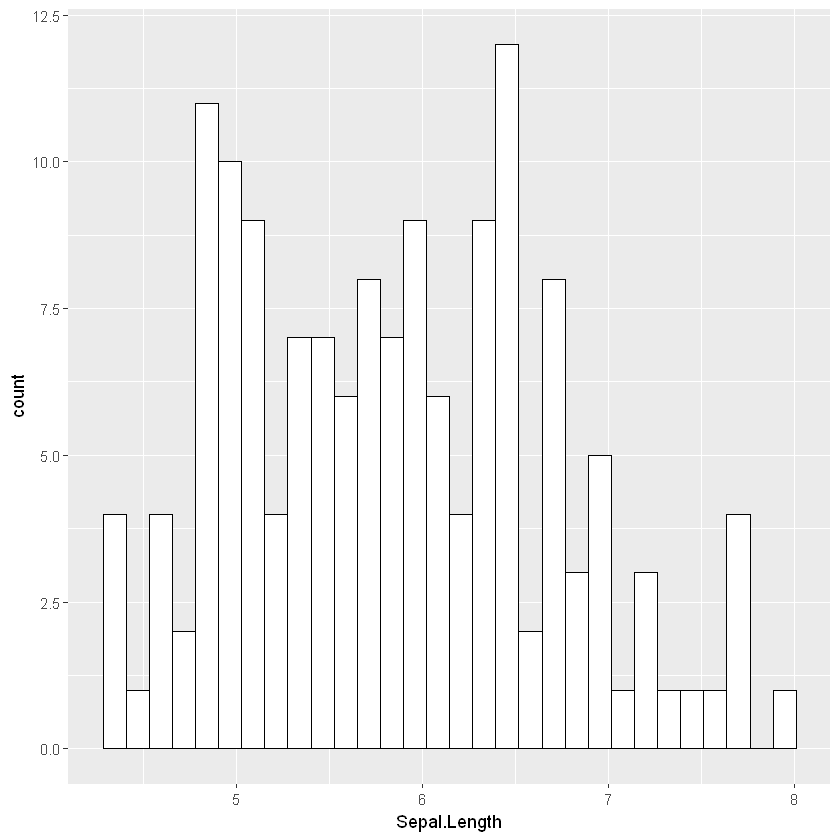

In [110]:
hist <- ggplot(iris, aes(x=Sepal.Length)) +  geom_histogram(color="black", fill="white")
hist

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


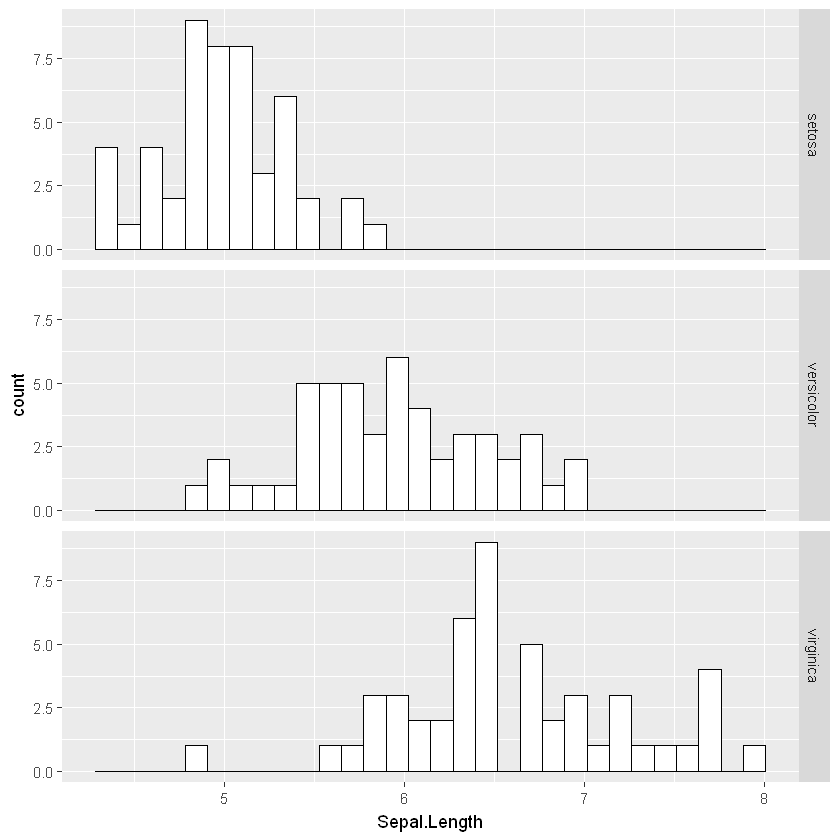

In [111]:
hist + facet_grid(Species ~ .) # añadimos condicionamiento para separar el factor

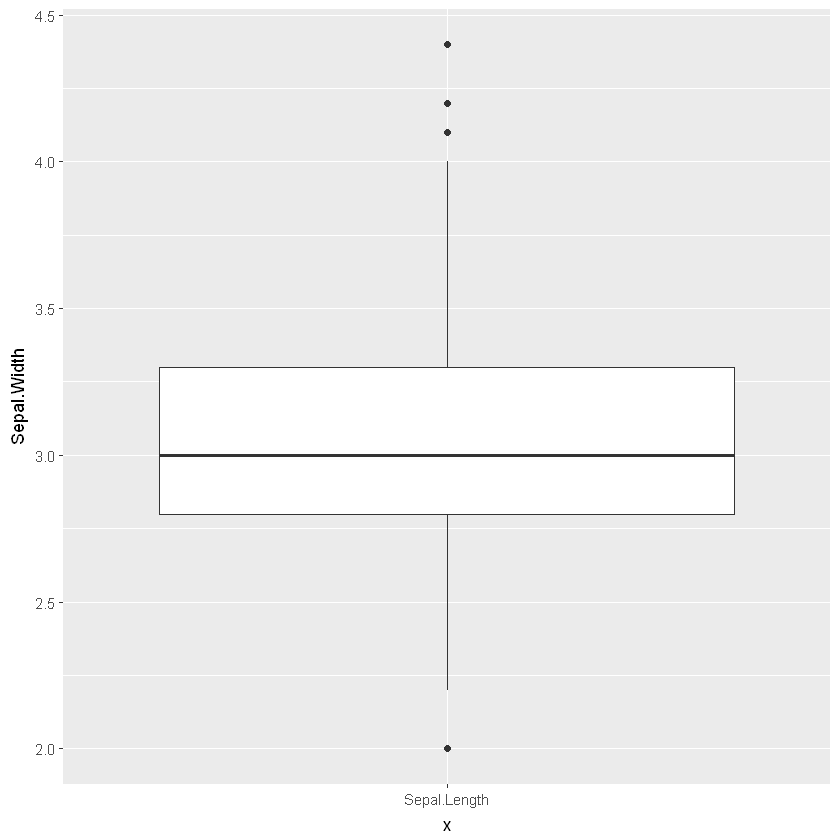

In [121]:
bplot <- ggplot(iris, aes(x = "Sepal.width", y = Sepal.Width))
bplot + geom_boxplot()

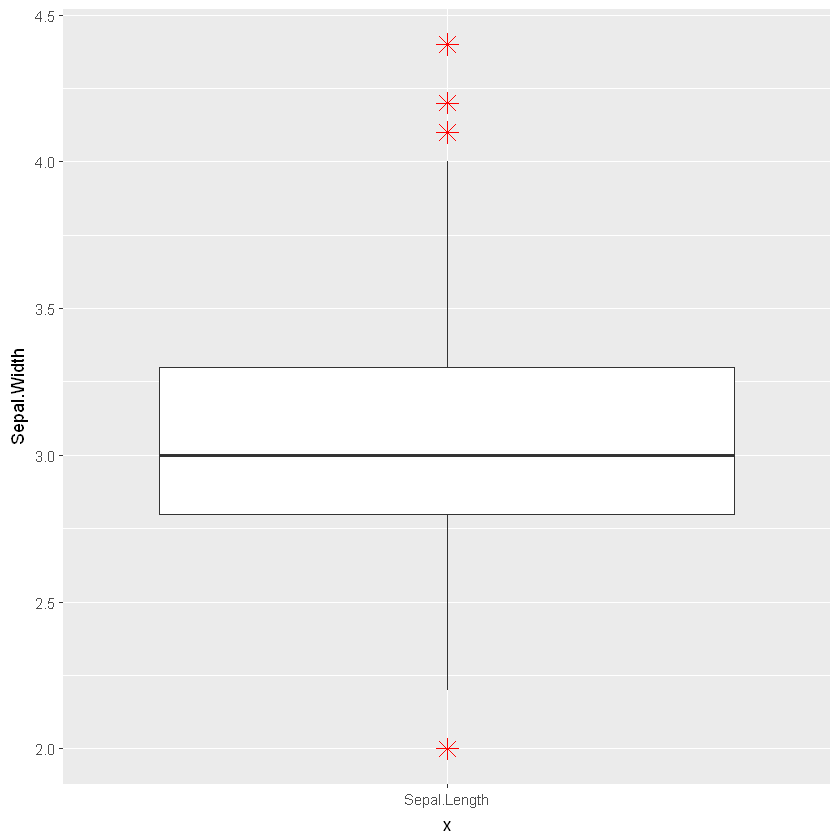

In [122]:
bplot + geom_boxplot(outlier.colour="red", outlier.shape=8, outlier.size=4)

__Ejercicio__

Añadir condicionamiento al histograma anterior para diferenciar por especie y dibujar las 3 separadas dentro del mismo plot.

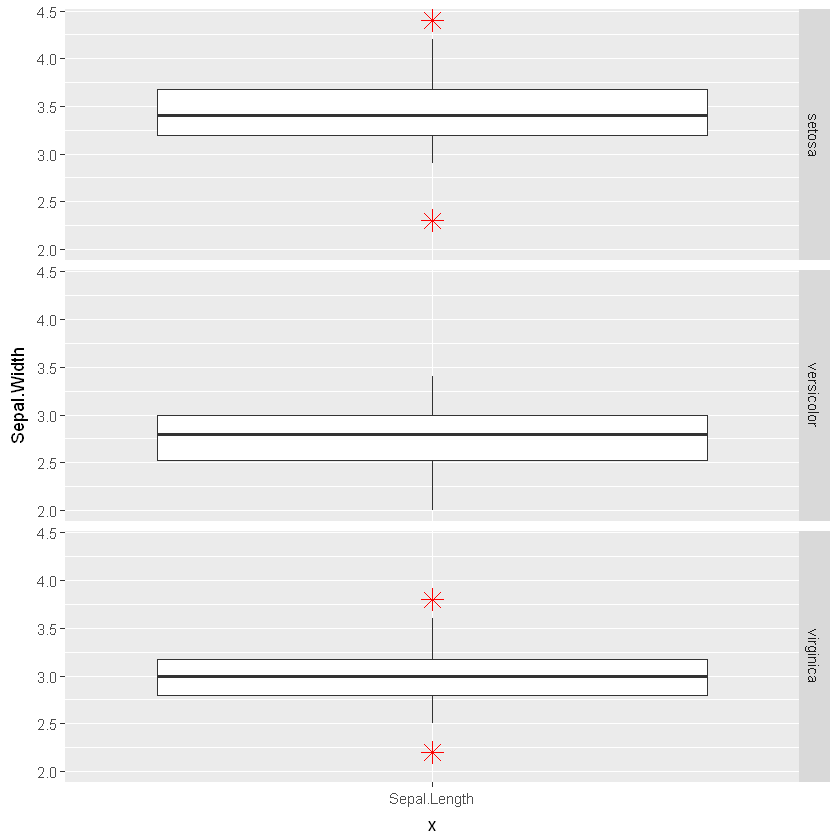

In [123]:
bplot + geom_boxplot(outlier.colour="red", outlier.shape=8, outlier.size=4) + facet_grid(Species ~ .)

In [124]:
?facet_grid